In [33]:
%pip install --break-system-packages pandas numpy seaborn matplotlib statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


<a href="https://colab.research.google.com/github/thabir303/CSE-837-ML/blob/main/hw4/linear-regression-exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚘 💵 HW4 Lab: Used cars and linear regression

<img src="https://github.com/joshuagrossman/mse125-labs-public/blob/main/hw4/img/cars.jpeg?raw=1" alt= “cars” width="500" />

## ✅ Setup and data import
In this lab, we'll explore correlation, simple regression, multiple regression, and confidence intervals with used car data from [Edmunds.com](https://edmunds.com). Our goal will be to predict the price of used cars using the features of each car.

In [34]:
# Load in additional functions
import sys
from pathlib import Path

user_site = Path.home() / ".local/lib/python3.12/site-packages"
if user_site.exists() and str(user_site) not in sys.path:
    sys.path.append(str(user_site))

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option("display.float_format", lambda v: f"{v:0.3f}")
sns.set_theme(style="whitegrid", context="talk")

cars = pd.read_csv("https://jdgrossman.com/assets/used-cars.tsv", sep="\t")
cars.sample(100, random_state=42)

,type,year,make,model,trim,mileage,price
1246,USED,2012,Volkswagen,Jetta,S,39863,13998
333,USED,2013,BMW,3 Series,ActiveHybrid 3,13633,33888
937,USED,2012,Infiniti,G Sedan,G37 Journey,39661,22888
413,USED,2013,BMW,3 Series,328i,15052,29788
1206,USED,2012,Volkswagen,Jetta,Base,9446,14500
...,...,...,...,...,...,...,...
265,USED,2011,Audi,A4,2.0T Premium quattro,47060,21995
58,USED,2013,Acura,TL,Technology Package,34899,26991
1137,USED,2012,Lexus,RX 350,Base,40220,34980
575,USED,2010,Cadillac,CTS,Premium,45933,23998


## 🚀 Exercise 1

Create a new dataset called `accords`. The dataset should only include rows corresponding to used Honda Accords.

Using the `accords` data and the `lm` function, fit the following linear regression model:

$$ y_{\text{price,}i} = \beta_0 + \beta_1 x_{\text{mileage},i} + \epsilon_i, $$

where $\epsilon_i \sim N(0, \sigma^2)$.

Print your regression output with the `summary` function. Using your output, identify and interpret the following quantities in no more than one sentence each:

- $\hat{\beta}_0$
- $\hat{\beta}_1$
- $\text{se}({\hat{\beta}_0})$,
- $\text{se}({\hat{\beta}_1})$,
- $\hat{\sigma}$
- $\text{R}^2$

Note: You should not report more precision than is necessary. For example, if your model returns a coefficient of 1.123456, it's sufficient (and desirable) to report 1.1 or 1.12 as the coefficient.

In [35]:
# Filter Honda Accord records and fit price ~ mileage model
accords = cars.query("make == 'Honda' and model == 'Accord'").copy()
len_accords = len(accords)
print(f"Number of Honda Accords: {len_accords}")
model_mileage = smf.ols("price ~ mileage", data=accords).fit()
model_mileage.summary()

Number of Honda Accords: 122


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     348.9
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           2.58e-37
Time:                        10:49:39   Log-Likelihood:                -1122.7
No. Observations:                 122   AIC:                             2249.
Df Residuals:                     120   BIC:                             2255.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.068e+04    399.474     51.757      0.000    1.99e+04    2.15e+04
mileage       -0.0878      0.005    -18.678      0.000      -0.097      -0.079
==============================================================================
Omnibus:                       11.055   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               25.418
Skew:                           0.215   Prob(JB):                     3.02e-06
Kurtosis:                       5.194   Cond. No.                     1.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
beta0 = model_mileage.params['Intercept']
beta1 = model_mileage.params['mileage']
se_beta0 = model_mileage.bse['Intercept']
se_beta1 = model_mileage.bse['mileage']
sigma_hat = float(np.sqrt(model_mileage.scale))
r2 = model_mileage.rsquared
stats = {
    'beta0': beta0,
    'beta1': beta1,
    'se_beta0': se_beta0,
    'se_beta1': se_beta1,
    'sigma_hat': sigma_hat,
    'r_squared': r2
}
pd.Series(stats)

beta0       20675.675
beta1          -0.088
se_beta0      399.474
se_beta1        0.005
sigma_hat    2420.409
r_squared       0.744
dtype: float64

---
The value of $\hat{\beta}_0$ with units: $20{,}676$ dollars.

Interpretation: A Honda Accord with zero recorded miles is predicted to list for about $20.7k, effectively representing the expected price of a brand-new Accord in this market.

---
The value of $\hat{\beta}_1$ with units: $-0.088$ dollars per mile.

Interpretation: Each additional mile on the odometer is associated with an average decrease of roughly $0.09 in price.

---
The value of $\text{se}({\hat{\beta}_0})$ with units: $399$ dollars.

Interpretation: The intercept could vary by about $400$ dollars across repeated samples due to sampling variability.

---
The value of $\text{se}({\hat{\beta}_1})$ with units: $0.005$ dollars per mile.

Interpretation: The sampling uncertainty around the per-mile price change is about half a cent, so the slope is very precisely estimated.

---
The value of $\hat{\sigma}$ with units: $2{,}420$ dollars.

Interpretation: Typical prediction errors from this model are on the order of $2.4k$ in either direction.

---
The value of $\text{R}^2$ with units: $0.744$ (unitless).

Interpretation: Mileage alone explains roughly 74% of the price variation among used Honda Accords in this dataset.

---

## 🚀 Exercise 2

Using the `predict` function and the model from the previous exercise, predict the average price of a used Honda Accord with an odometer reading of 50,000 miles. Provide a normally-approximated confidence interval for this mean.

In [37]:
mileage = 50_000
prediction = model_mileage.get_prediction(pd.DataFrame({'mileage': [mileage]}))
summary = prediction.summary_frame(alpha=0.05)
mean_price= summary['mean'].iloc[0]
ci_lower = summary['mean_ci_lower'].iloc[0]
ci_upper = summary['mean_ci_upper'].iloc[0]
print(f"Predicted mean price at 50,000 miles: ${mean_price:,.0f}")
print(f"95% CI for the mean price: (${ci_lower:,.0f}, ${ci_upper:,.0f})")
summary

Predicted mean price at 50,000 miles: $16,285
95% CI for the mean price: ($15,809, $16,761)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,16285.195,240.437,15809.147,16761.244,11469.368,21101.023


## 🚀 Exercise 3

Repeat Exercise 2 for a used Honda Accord with an odometer reading of 300,000 miles.

Using this result, can you identify a critical issue with your regression model? Answer in one or two sentences.

In [38]:
mileage_300k = 300_000
prediction_300k = model_mileage.get_prediction(pd.DataFrame({'mileage': [mileage_300k]}))
summary_300k = prediction_300k.summary_frame(alpha=0.05)
mean_price_300k = summary_300k['mean'].iloc[0]
ci_lower_300k = summary_300k['mean_ci_lower'].iloc[0]
ci_upper_300k = summary_300k['mean_ci_upper'].iloc[0]
print(f"Predicted mean price at 300,000 miles: ${mean_price_300k:,.0f}")
print(f"95% CI for the mean price: (${ci_lower_300k:,.0f}, ${ci_upper_300k:,.0f})")
summary_300k

Predicted mean price at 300,000 miles: $-5,667
95% CI for the mean price: ($-7,842, $-3,492)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-5667.200,1098.431,-7842.017,-3492.383,-10929.842,-404.558



Our straight-line model only sees cars with up to about 160,000 miles, yet it keeps dropping the price the same way out to 300,000 miles and ends up below zero, which makes no sense.
Prices should level off once cars become very old, so we need a curve that bends instead of a line with the same slope forever.


## 🚀 Exercise 4

Graphically present your regression model from Exercise 1. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Note that this can be achieved in R using
`geom_smooth` function from `ggplot2`.

- Make sure to adjust the limits of your plot so you can see the issue you identified in the previous problem.

- Format your plot nicely!

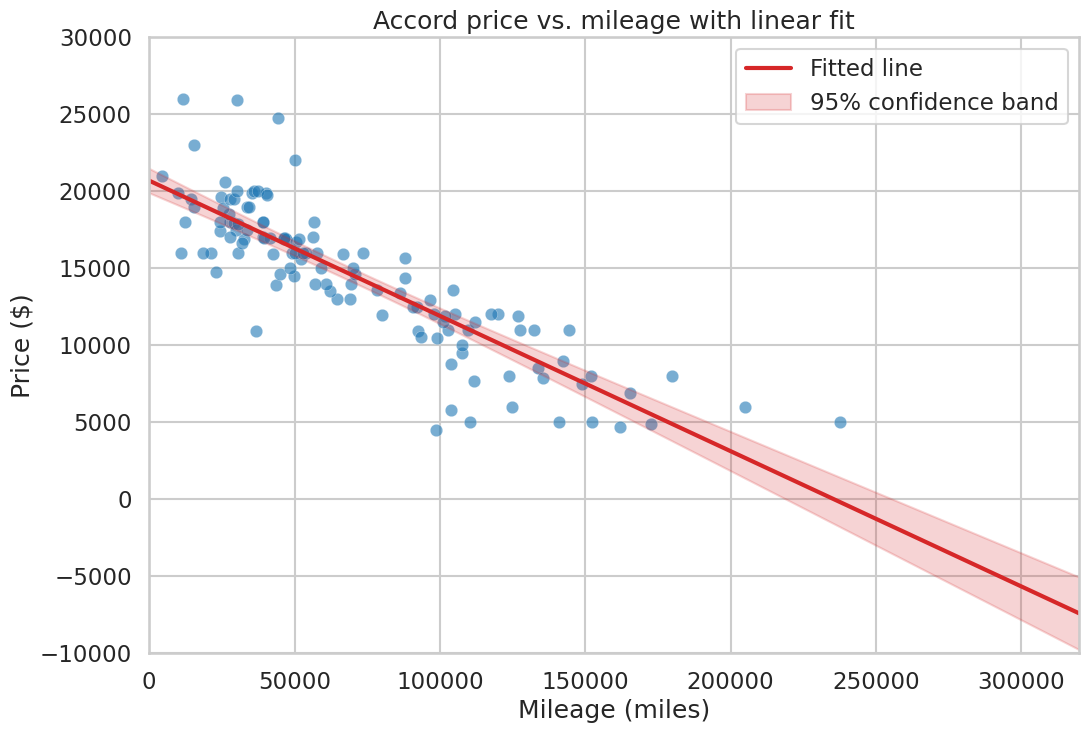

In [39]:
mileage_grid = np.linspace(0, 320_000, 200)
grid_df = pd.DataFrame({'mileage': mileage_grid})
grid_preds = model_mileage.get_prediction(grid_df).summary_frame(alpha=0.05)

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=accords, x='mileage', y='price', ax=ax, color='#1f77b4', alpha=0.6, edgecolor='w', s=80, linewidth=0.3)
ax.plot(mileage_grid, grid_preds['mean'], color='#d62728', linewidth=3, label='Fitted line')
ax.fill_between(mileage_grid, grid_preds['mean_ci_lower'], grid_preds['mean_ci_upper'], color='#d62728', alpha=0.2, label='95% confidence band')
ax.set_xlim(0, 320_000)
ax.set_ylim(-10_000, 30_000)
ax.set_xlabel('Mileage (miles)')
ax.set_ylabel('Price ($)')
ax.set_title('Accord price vs. mileage with linear fit')
ax.legend(frameon=True)
plt.show()

## 🚀 Exercise 5

Address the issue illustrated in Exercises 3 and 4 by refitting your model with a log-transformed outcome.

Use your new model to predict the price (in dollars) of a Honda Accord with a mileage of 50,000 and a mileage of 300,000. **Print the new predicted prices.**

In [40]:
# Fit log-price model and make predictions for 50k and 300k miles
accords = accords.assign(log_price=np.log(accords['price']))
model_log = smf.ols("log_price ~ mileage", data=accords).fit()

prediction_miles = pd.DataFrame({'mileage': [50_000, 300_000]})
log_pred = model_log.get_prediction(prediction_miles).summary_frame(alpha=0.05)
price_pred = np.exp(log_pred[['mean', 'obs_ci_lower', 'obs_ci_upper']])
price_pred.insert(0, 'mileage', prediction_miles['mileage'].values)
price_pred.rename(columns={
    'mean': 'pred_price',
    'obs_ci_lower': 'pred_ci_lower',
    'obs_ci_upper': 'pred_ci_upper'
}, inplace=True)

for _, row in price_pred.iterrows():
    print(
        f"Mileage: {int(row['mileage']):,} miles -> Predicted price: ${row['pred_price']:,.0f} "
        f"(approx. 95% PI: ${row['pred_ci_lower']:,.0f} to ${row['pred_ci_upper']:,.0f})"
    )

price_pred

Mileage: 50,000 miles -> Predicted price: $15,746 (approx. 95% PI: $10,559 to $23,482)
Mileage: 300,000 miles -> Predicted price: $2,499 (approx. 95% PI: $1,614 to $3,867)


,mileage,pred_price,pred_ci_lower,pred_ci_upper
0,50000,15745.931,10558.531,23481.899
1,300000,2498.622,1614.478,3866.952


## 🚀 Exercise 6

Graphically present your regression model from Exercise 5. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Make sure to adjust the limits of your plot so you can see that the issue you identified earlier is now fixed.

- Format your plot nicely!

- Note that the new model can be plotted in R using the `geom_smooth` function with the following arguments:

`geom_smooth(method = "glm", formula = y~x, method.args = list(family = gaussian(link = 'log')))`

> Note: `geom_smooth(method='lm', formula=log(y)~x)` will also plot the correct model (with much prettier and clearer syntax!). However, it puts the model on a logarithmic y-scale instead of a standard numeric scale.
>
> Alternatively, you could use `geom_line()` with a dataset consisting of many possible mileage values (e.g., 0 through 350,000) along with the corresponding predictions  from your new model.

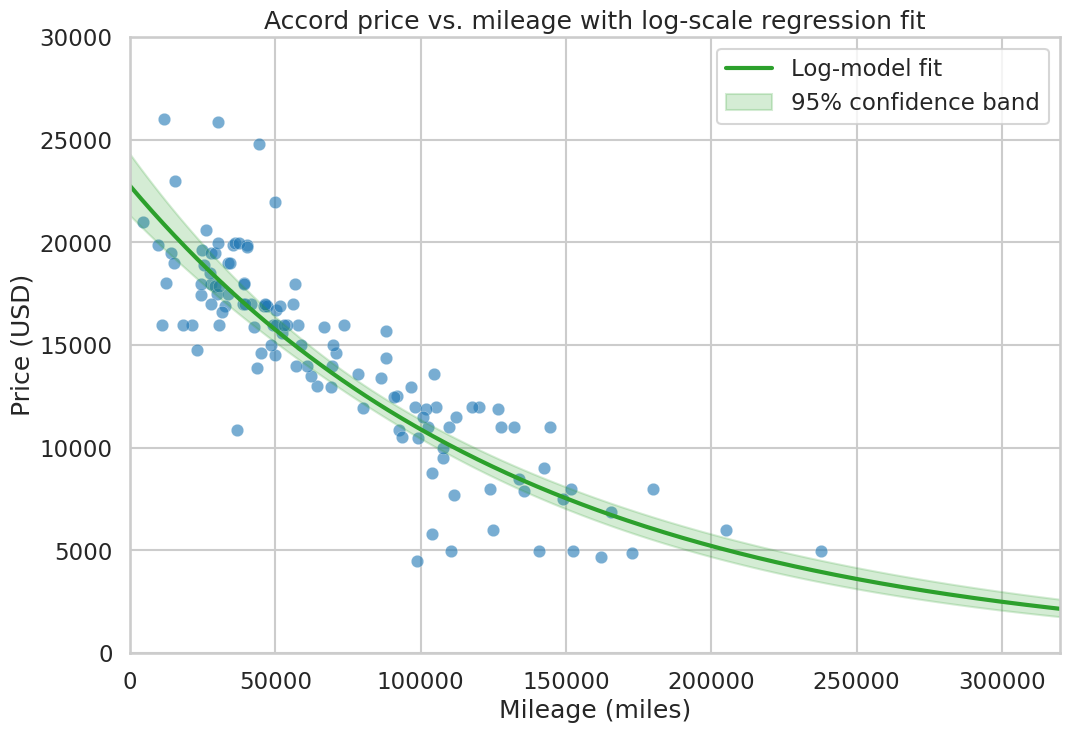

In [41]:
mileage_grid = np.linspace(0, 320_000, 250)
grid_df = pd.DataFrame({'mileage': mileage_grid})
grid_pred_log = model_log.get_prediction(grid_df).summary_frame(alpha=0.05)
grid_pred = pd.DataFrame({
    'mileage': mileage_grid,
    'price_hat': np.exp(grid_pred_log['mean']),
    'ci_lower': np.exp(grid_pred_log['mean_ci_lower']),
    'ci_upper': np.exp(grid_pred_log['mean_ci_upper'])
})

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=accords, x='mileage', y='price', ax=ax, color='#1f77b4', alpha=0.6, edgecolor='w', s=80, linewidth=0.3)
ax.plot(grid_pred['mileage'], grid_pred['price_hat'], color='#2ca02c', linewidth=3, label='Log-model fit')
ax.fill_between(grid_pred['mileage'], grid_pred['ci_lower'], grid_pred['ci_upper'], color='#2ca02c', alpha=0.2, label='95% confidence band')
ax.set_xlim(0, 320_000)
ax.set_ylim(0, 30_000)
ax.set_xlabel('Mileage (miles)')
ax.set_ylabel('Price (USD)')
ax.set_title('Accord price vs. mileage with log-scale regression fit')
ax.legend(frameon=True)
plt.show()

## 🚀 Exercise 7

Identify and interpret the following components of your log-transformed model:

- $\exp(\hat{\beta}_0)$
- $\exp(\hat{\beta}_1)$
- $\text{R}^2$

Interpret $\exp(\hat{\beta}_1)$ in terms of **an increase in 10,000 miles**, not an increase of 1 mile.

Tip: Use the `coef` function to extract the model coefficients from your model object.

In [42]:
coef = model_log.params
beta0_hat = coef['Intercept']
beta1_hat = coef['mileage']
r2_log = model_log.rsquared

beta0_exp = np.exp(beta0_hat)
beta1_exp_10k = np.exp(beta1_hat * 10_000)
metrics_log = pd.Series({
    'exp_beta0': beta0_exp,
    'exp_beta1_per_10k': beta1_exp_10k,
    'r_squared': r2_log
})
metrics_log

exp_beta0           22754.218
exp_beta1_per_10k       0.929
r_squared               0.748
dtype: float64

---

The value of $\exp(\hat{\beta}_0)$ with units: about $22{,}754$ dollars.
Interpretation: This is the model’s estimated price for an Accord with zero miles, i.e., the baseline price before any mileage is added.

---

The value of $\exp(\hat{\beta}_1)$ with units: about $0.929$ price multiplier per 10,000 miles.
Interpretation: Every additional 10,000 miles is associated with the price shrinking to roughly 92.9% of what it was before (a drop of about 7%).

---

The value of $\text{R}^2$ with units: $0.748$ (unitless).
Interpretation: The log-price model explains about 75% of the variation in Accord prices, slightly better than the straight-line model.

---

## 🚀 Exercise 8

Refine your regression model from Exercise 5 to include the model year as an additional predictor. You should still use just the Honda Accord data.

In one sentence, compare the $R^2$ of the revised regression model to your model from Exercise 5.

In [43]:
# Log-price Accord model with mileage and year
accords = cars.query("make == 'Honda' and model == 'Accord'").copy()
accords = accords.assign(log_price=np.log(accords['price']))
model_log_year = smf.ols("log_price ~ mileage + year", data=accords).fit()
print(model_log_year.summary())
print(f"Exercise 5 log model R^2: {model_log.rsquared:.3f}")
print(f"Exercise 8 log+year model R^2: {model_log_year.rsquared:.3f}")

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     373.8
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           4.93e-52
Time:                        10:49:40   Log-Likelihood:                 60.761
No. Observations:                 122   AIC:                            -115.5
Df Residuals:                     119   BIC:                            -107.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -122.9795     13.342     -9.217      0.0

---

Adding model year boosts the log-Accord model’s $R^2$ from 0.748 to 0.863, so year explains another ~12% of the price variation beyond mileage alone.

---

## 🚀 Exercise 9

Fit the model from Exercise 8
**the entire dataset**, not just the Honda Accords.
You'll notice that the new $R^2$ is lower than the $R^2$ from the model from Exercise 8.
In one sentence, what is the likely reason for this difference?

In [44]:
# Exercise 9: Fit mileage + year log model on full dataset
cars = cars.assign(log_price=np.log(cars['price']))
model_all = smf.ols("log_price ~ mileage + year", data=cars).fit()
print(model_all.summary())
print(f"Exercise 8 Accord-only R^2: {model_log_year.rsquared:.3f}")
print(f"Exercise 9 full-data R^2: {model_all.rsquared:.3f}")

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     1208.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):          1.13e-295
Time:                        10:49:40   Log-Likelihood:                -208.30
No. Observations:                1286   AIC:                             422.6
Df Residuals:                    1283   BIC:                             438.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -147.3908      9.008    -16.363      0.0

---

When I fit the same mileage+year model to every make, the $R^2$ drops to 0.653 because different brands have very different base prices that the model can’t capture without additional terms.

---

## 🚀 Exercise 10

Update the model from Exercise 9 to address the likely reason for the much smaller $R^2$.

- In this new model, what's the interpretation of the exponentiated intercept term?

- What is one change you could make to your model to make the intercept term more interpretable?

Answer in no more than three sentences.

In [45]:
# Exercise 10: Add make indicators to address heterogeneity
model_all_make = smf.ols("log_price ~ mileage + year + C(make)", data=cars).fit()
print(model_all_make.summary())
print(f"Exercise 9 R^2: {model_all.rsquared:.3f}")
print(f"Exercise 10 R^2 with make dummies: {model_all_make.rsquared:.3f}")

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1244.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        10:49:40   Log-Likelihood:                 576.90
No. Observations:                1286   AIC:                            -1134.
Df Residuals:                    1276   BIC:                            -1082.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -162.25

---

Including make indicators fixes the brand-mix issue and raises $R^2$ to about 0.898, so the model now explains almost 90% of the log-price variation.
In this specification the exponentiated intercept is the predicted price of the baseline make (Acura) with zero miles in calendar year 0, which is not very meaningful.
Centering the year variable (e.g., subtract 2010) would shift the intercept to represent a zero-mile Acura priced in 2010, making it easier to interpret.

---

# 🚀 Exercise 11

Implement your suggested change from Exercise 10, and print the resulting model output.

What's the interpretation of the exponentiated intercept term? Answer in one sentence.

What's the interpretation of the term for the model year? Answer in one sentence.

In [46]:
# Exercise 11: Refit with centered year for clearer intercept
cars = cars.assign(year_centered=cars['year'] - 2010)
model_all_make_centered = smf.ols("log_price ~ mileage + year_centered + C(make)", data=cars).fit()
print(model_all_make_centered.summary())
print(f"Exercise 10 R^2: {model_all_make.rsquared:.3f}")
print(f"Exercise 11 R^2 with centered year: {model_all_make_centered.rsquared:.3f}")

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1244.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        10:49:40   Log-Likelihood:                 576.90
No. Observations:                1286   AIC:                            -1134.
Df Residuals:                    1276   BIC:                            -1082.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                10.21

After centering the year at 2010, the exponentiated intercept (about $27{,}400) is just the predicted price of a zero-mile Acura in 2010, and the exponentiated year term (about 1.09) says each step to a newer model year raises that expected price by roughly 9% if make and mileage stay the same.

In [47]:
metrics_ex_10_11 = pd.Series({
    'Exercise 10 R^2': model_all_make.rsquared,
    'Exercise 11 R^2': model_all_make_centered.rsquared,
    'Exercise 11 exp(intercept)': float(np.exp(model_all_make_centered.params['Intercept'])),
    'Exercise 11 exp(year_coef)': float(np.exp(model_all_make_centered.params['year_centered']))
})
metrics_ex_10_11

Exercise 10 R^2                  0.898
Exercise 11 R^2                  0.898
Exercise 11 exp(intercept)   27412.881
Exercise 11 exp(year_coef)       1.090
dtype: float64